In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pylab as plt
%matplotlib inline

## K-Means Algorithm

In [2]:
# Load the dataset
def generate_data(row,column,mu=0,sigma=1):
    data = sigma*np.random.randn(row,column)+mu
    return data

def Kmeans(data,k=2):
    
    def compute_distance(p1, p2):
        dis = np.sum((p1-p2)**2)
        return np.sqrt(dis)
    
    def rand_center(data,k):
        n = data.shape[1]
        centroids = np.zeros((k,n))
        for i in range(n):
            dmin, dmax = np.min(data[:,0]), np.max(data[:,1])
            centroids[:,i] = dmin + (dmax-dmin)*np.random.rand(k)
        return centroids
    
    def is_converged(centroid1, centroid2):
        set1 = set([tuple(c) for c in centroid1])
        set2 = set([tuple(c) for c in centroid2])
        return (set1==set2)
    
    n = data.shape[0]
    centroids = rand_center(data,k)
    label = np.zeros(n, dtype=np.int)
    assement = np.zeros(n)
    conveged =False
    
    while not conveged:
        old_centroid = np.copy(centroids)
        for i in range(n):
            min_dist, min_index = np.inf,-1
            for j in range(k):
                dis = compute_distance(data[i], centroids[j])
                if dis < min_dist:
                    min_dist, min_index = dis, j
                    label[i] = j
            assement[i] = compute_distance(data[i], centroids[label[j]])**2
        
        for m in range(k):
            centroids[m] = np.mean(data[label==m], axis=0)
        converged = is_converged(old_centroid, centroids)
        return centroids, label, np.sum(assement)

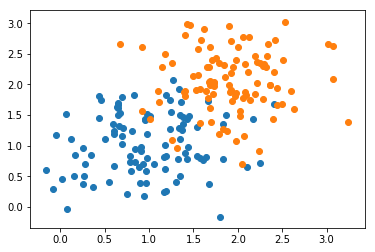

In [3]:
x1 = generate_data(100,2,mu=1, sigma=0.5)
x2 = generate_data(100,2, mu=2, sigma=0.5)
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])

In [4]:
data = np.concatenate([x1,x2],axis=0)
centroids, label, sum_assement = Kmeans(data,k=2)

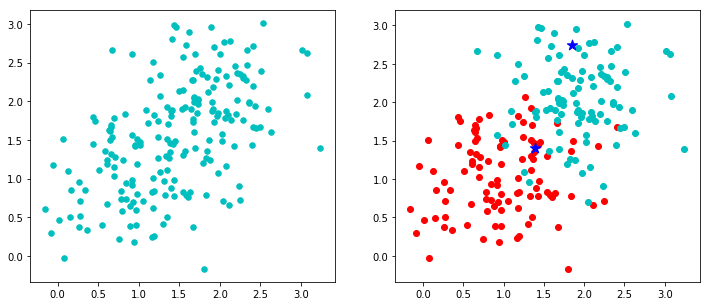

In [5]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.scatter(data[:,0],data[:,1], c='c', s=30, marker='o')
ax2.scatter(x1[:,0],x1[:,1],c='r')
ax2.scatter(x2[:,0],x2[:,1],c='c')
ax2.scatter(centroids[:,0],centroids[:,1],c='b',s=120,marker='*')

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=2, init='random').fit(data)
centroids_sklearn = kmeans.cluster_centers_

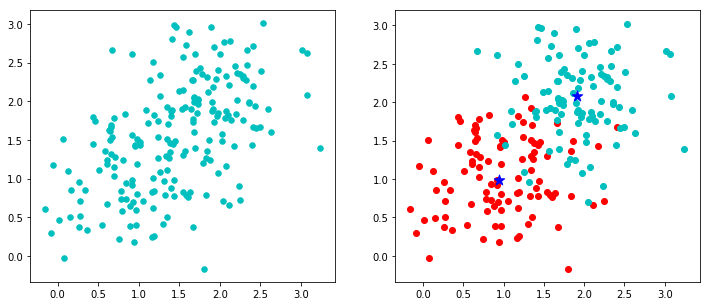

In [8]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.scatter(data[:,0],data[:,1], c='c', s=30, marker='o')
ax2.scatter(x1[:,0],x1[:,1],c='r')
ax2.scatter(x2[:,0],x2[:,1],c='c')
ax2.scatter(centroids_sklearn[:,0],centroids_sklearn[:,1],c='b',s=120,marker='*')

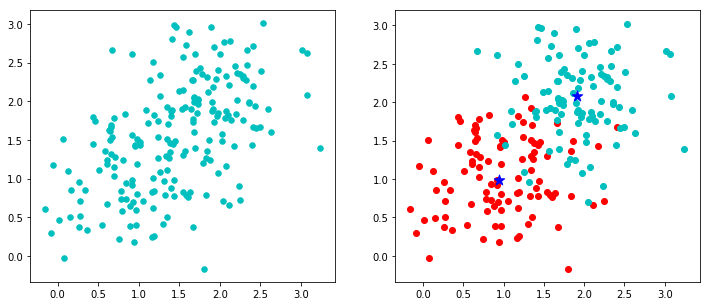

In [9]:
kmeans = KMeans(n_clusters=2, init='k-means++').fit(data)
centroids_sklearn = kmeans.cluster_centers_
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.scatter(data[:,0],data[:,1], c='c', s=30, marker='o')
ax2.scatter(x1[:,0],x1[:,1],c='r')
ax2.scatter(x2[:,0],x2[:,1],c='c')
ax2.scatter(centroids_sklearn[:,0],centroids_sklearn[:,1],c='b',s=120,marker='*')

In [10]:
from sklearn.datasets import load_sample_image
import cv2

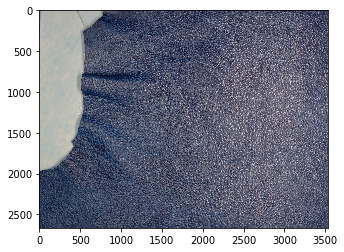

In [11]:
img_path = '/Users/xiaojun/Desktop/sample_photo/photo_sample/save_width/DSCF7060.JPG'
img = cv2.imread(img_path)
plt.imshow(img)

In [12]:
img = img.astype(np.float64)/255

In [13]:
w,h,c = img.shape
img_data = img.reshape(w*h,c)
n_colors = 3
kmean = KMeans(n_clusters=n_colors, init='k-means++').fit(img_data)

In [14]:
def recreate_image(codebook,labels,w,h):
    d = codebook.shape[1]
    image = np.zeros((w,h,d))
    label_indx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_indx]]
            label_indx += 1
    return image

In [15]:
recreate_image = recreate_image(kmean.cluster_centers_, kmean.labels_, w,h)

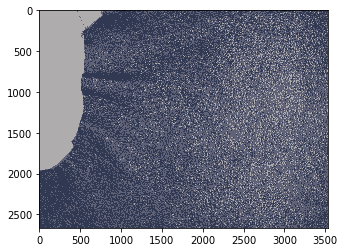

In [16]:
plt.imshow(recreate_image)

In [35]:
image = recreate_image*255.0
image_out = np.copy(image)
image_out = image_out.astype(np.uint8)

In [36]:
import cv2

In [37]:
image_gray = cv2.cvtColor(image_out, cv2.COLOR_RGB2GRAY)

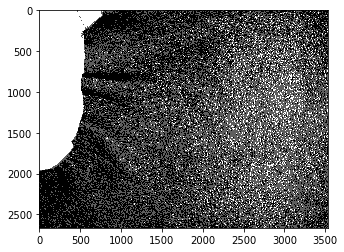

In [44]:
ret,th1 = cv2.threshold(image_gray,160,255,cv2.THRESH_BINARY)

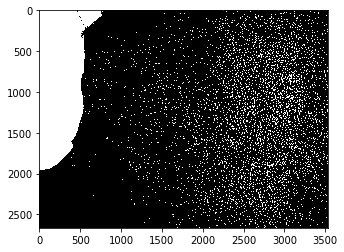

In [45]:
plt.imshow(th1,cmap='gray')

In [48]:
from skimage.morphology import square
from skimage.filters import rank

In [69]:
mean_th1 = rank.mean(th1, selem=square(50))

In [70]:
mean_th1

array([[221, 218, 216, ...,   8,   8,   8],
       [223, 219, 217, ...,   7,   7,   8],
       [224, 221, 218, ...,   7,   8,   8],
       ..., 
       [  0,   0,   0, ...,   2,   2,   2],
       [  0,   0,   0, ...,   2,   2,   2],
       [  0,   0,   0, ...,   2,   2,   2]], dtype=uint8)

In [71]:
ret,th2 = cv2.threshold(th1,210,255,cv2.THRESH_BINARY)

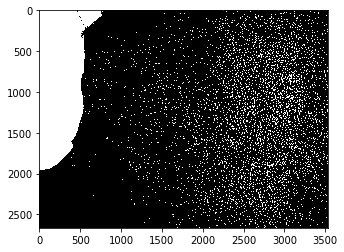

In [72]:
plt.imshow(th2, cmap='gray')